In [1]:
! pip install networkx
! pip install plotly
! pip install colorlover
! pip install NRCLex

     |████████████████████████████████| 399kB 4.3MB/s 
  Created wheel for NRCLex: filename=NRCLex-3.0.0-cp36-none-any.whl size=43313 sha256=9832a8872620cfc995b2e515e3193ffdc643aa8e2e5b3dae6825ed2c4581ba65
  Stored in directory: /root/.cache/pip/wheels/17/31/64/035a8d245b4c217aeb8e8a2702d05dc91544b9c2334db72414
Successfully built NRCLex


In [2]:
import networkx as nx
import pandas as pd

In [3]:
!unzip tweets2009-06-0115.csv.zip

Archive:  tweets2009-06-0115.csv.zip
  inflating: tweets2009-06-0115.csv  


**Q1. Choose a hash-tag**

**I choose hash-tag #sports**

In [196]:
df = pd.read_csv("tweets2009-06-0115.csv", sep='\t')

In [197]:
print("Num of rows:", df.shape[0])

Num of rows: 3437690


In [198]:
df.head()

,date,user,tweet
0,2009-06-01 21:43:59,burtonator,No Post Title
1,2009-06-01 21:47:23,burtonator,No Post Title
2,2009-06-02 01:15:44,burtonator,No Post Title
3,2009-06-02 05:17:52,burtonator,No Post Title
4,2009-06-02 23:58:25,burtonator,No Post Title


In [199]:
from collections import Counter
allTweets = df["tweet"].str.cat(sep=' ')
tweetWords = [word.strip(""" ,.:'\";""").lower() for word in allTweets.split()]
hashTags = [word for word in tweetWords if word.startswith("#")]
hashTagsCounter = Counter(hashTags)

In [200]:
hashTagsCounter.most_common(150)

[('#iranelection', 26853),
 ('#followfriday', 16400),
 ('#jobs', 13322),
 ('#iremember', 11057),
 ('#spymaster', 10587),
 ('#ff', 10446),
 ('#squarespace', 9198),
 ('#tcot', 7691),
 ('#fb', 6107),
 ('#cnnfail', 4451),
 ('#11thcommandment', 3429),
 ('#jtv', 3317),
 ('#140mafia', 3144),
 ('#iran', 2935),
 ('#', 2895),
 ('#news', 2837),
 ('#quote', 2750),
 ('#vampirebite', 2634),
 ('#1', 2587),
 ('#bsb', 2433),
 ('#tweetmyjobs', 2086),
 ('#iphone', 1697),
 ('#lastfm', 1599),
 ('#mp2', 1589),
 ('#niley', 1528),
 ('#music', 1489),
 ('#p2', 1439),
 ('#follow', 1390),
 ('#pawpawty', 1305),
 ('#hhrs', 1256),
 ('#fail', 1246),
 ('#twitter', 1216),
 ('#tlot', 1214),
 ('#facebook', 1177),
 ('#sgp', 1151),
 ('#mashchat', 1143),
 ('#tinychat', 1111),
 ('#2', 1107),
 ('#digg', 1102),
 ('#gop', 1009),
 ('#phish', 1001),
 ('#mlb', 962),
 ('#travel', 932),
 ('#bonnaroo', 887),
 ('#twitpocalypse', 879),
 ('#iranelections', 857),
 ('#rt', 856),
 ('#zensursula', 811),
 ('#jamlegend', 790),
 ('#quotes', 75

In [201]:
# make a new dataframe just with our hashtag
sportsTag = df[df["tweet"].str.lower().str.contains("#sports", na=False)].copy()

In [202]:
sportsTag

,date,user,tweet
7360,2009-06-11 17:09:58,ptishow,Just added myself to the http://wefollow.com t...
9738,2009-06-11 17:12:19,bigmiggy24,Just added myself to the http://wefollow.com t...
11227,2009-06-11 17:13:41,headlinesindia,Seven Indians in Asian boxing semifinals | htt...
11489,2009-06-11 17:13:50,schreibz88,Just added myself to the http://wefollow.com t...
12882,2009-06-11 17:15:44,replayphotos,Just added myself to the http://wefollow.com t...
...,...,...,...
3401221,2009-06-14 23:05:58,asheville,#sports #baltimore Wigginton helps lead Oriole...
3408756,2009-06-14 23:17:15,kevinkillem,Just added myself to the http://wefollow.com t...
3430439,2009-06-14 23:50:09,womentalksports,Captain's Corner Solheim Cup Beth Daniel http:...
3430467,2009-06-14 23:50:10,womentalksports,Game capsule: San Antonio vs. New York http://...


**Q2. Build a Mention Graph**

In [203]:
def addMentionedColumn(df):
    
    def mentionsList(txt):
        allWords = [word.strip(""" ),.:'\";""").lower() for word in txt.split()]
        allNames = [word.strip("@") for word in allWords if word.startswith("@")]
        uniqueNames = list(set(allNames))
        return allNames
    
    df["mentioned"] = df["tweet"].apply(mentionsList)

In [204]:
addMentionedColumn(sportsTag)

In [205]:
# for all the tweets with your hashtag, build the mention graph
def mentionGraph(df):
    g = nx.Graph()
    
    for (index, date, user, tweet, mentionedUsers) in df.itertuples():
        for mentionedUser in mentionedUsers:
            if (user in g) and (mentionedUser in g[user]):
                g[user][mentionedUser]["numberMentions"] += 1
            else:
                g.add_edge(user, mentionedUser, numberMentions=1)
    
    return g

In [206]:
sportsGraph = mentionGraph(sportsTag)

**(a).**

In [207]:
print("# nodes:", len(sportsGraph.nodes()))
print("# edges:", len(sportsGraph.edges()))

# nodes: 95
# edges: 81


**95 nodes and 81 edges in sports mention graph.**

**(b).**

Text(0.5, 1.0, 'the degree distribution of the sportsGraph')

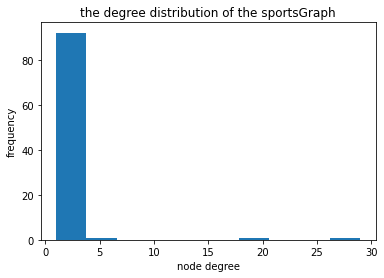

In [208]:
import matplotlib.pyplot as plt
plt.hist([nx.degree(sportsGraph)[node] for node in sportsGraph.nodes()])
plt.xlabel('node degree')
plt.ylabel('frequency')
plt.title('the degree distribution of the sportsGraph')

In [209]:
[nx.degree(sportsGraph)[node] for node in sportsGraph.nodes()].count(1)

77

In [210]:
[nx.degree(sportsGraph)[node] for node in sportsGraph.nodes()].count(2)

11

**Most of node degrees are 1 or 2, and especially node degree 1 have the largest proportion.**

**(c).**

In [211]:
deno = len([nx.degree(sportsGraph)[node] for node in sportsGraph.nodes()])

In [212]:
degree_count = Counter([nx.degree(sportsGraph)[node] for node in sportsGraph.nodes()])
y = [(degree_count[nx.degree(sportsGraph)[node]]/deno) for node in sportsGraph.nodes()]

Text(0, 0.5, 'fraction of nodes with that degree')

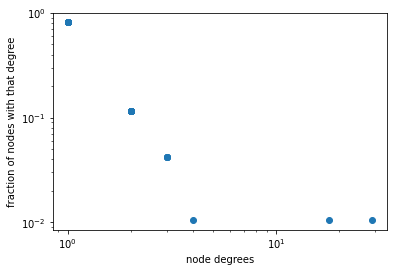

In [213]:
fig = plt.figure()
ax = plt.gca()
ax.scatter([nx.degree(sportsGraph)[node] for node in sportsGraph.nodes()], y)
ax.set_yscale('log')
ax.set_xscale('log')
plt.xlabel('node degrees')
plt.ylabel('fraction of nodes with that degree')

**The left half part exhibit a power law trend.As number of node degree increases, fraction of nodes with that degree decreases. Since the larger the node degrees is, the smaller the number of node is. But in the right half part, trend become flat, since nodes with high degree have almost same small amoumt as figure shown on part(b).**

**(d).**

In [214]:
weight_edges = [[(user1, user2), sportsGraph[user1][user2]["numberMentions"]] for (user1, user2) in sportsGraph.edges()]
df_weight = pd.DataFrame(data=weight_edges, columns=['two_users', 'num_mentioned'])

In [215]:
df_weight.sort_values('num_mentioned', ascending=False)

,two_users,num_mentioned
20,"(jussisolja, anssimakela)",4
60,"(dailymesports, mr504easy)",3
4,"(oak_athletics, thefantasyfix)",3
0,"(kackerl, soccerclips)",2
66,"(womentalksports, mr504easy)",2
...,...,...
29,"(monstersinsf, nickjoekevin01)",1
28,"(monstersinsf, meinungs_blog)",1
27,"(monstersinsf, ifyouseekdemi)",1
26,"(birdieblog, asheville)",1


In [216]:
sportsTag[sportsTag.user == 'jussisolja'].values

array([['2009-06-13 06:19:44', 'jussisolja',
        'RT Joining @anssimakela & @konaruss for a 24h bike race today #levi24 with #konabikes tracking with #sportstracker lol',
        list(['anssimakela', 'konaruss'])],
       ['2009-06-13 06:19:44', 'jussisolja',
        'RT Joining @anssimakela & @konaruss for a 24h bike race today #levi24 with #konabikes tracking with #sportstracker lol',
        list(['anssimakela', 'konaruss'])]], dtype=object)

In [217]:
sportsTag[sportsTag.user == 'anssimakela'].values

array([['2009-06-13 07:20:30', 'anssimakela',
        'RT @jussisolja: Follow our #levi24 adventure live via #sportstracker: http://bit.ly/18lEij',
        list(['jussisolja'])],
       ['2009-06-13 07:20:30', 'anssimakela',
        'RT @jussisolja: Follow our #levi24 adventure live via #sportstracker: http://bit.ly/18lEij',
        list(['jussisolja'])]], dtype=object)

**Since the user 'jussisolja' mention the user 'anssimakela' twice for joining bike race, and the user 'anssimakela' responded to the user 'jussisolja' back to say following the bike race live. These two users have the interaction, which make weight of edge between these two users increases to the highest-weighted edge.**

**(e).**

In [218]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objects as go
init_notebook_mode(connected=True)

def configure_plotly_browser_state():
  import IPython
  display(IPython.core.display.HTML('''
        <script src="/static/components/requirejs/require.js"></script>
        <script>
          requirejs.config({
            paths: {
              base: '/static/base',
              plotly: 'https://cdn.plot.ly/plotly-latest.min.js?noext',
            },
          });
        </script>
        '''))

In [219]:
import random
def addRandomPositions(graph):
    posDict = dict((node,(random.gauss(0,10),random.gauss(0,10))) for node in graph.nodes())
    nx.set_node_attributes(graph, name="pos", values=posDict)

In [220]:
addRandomPositions(sportsGraph)

In [221]:
import colorlover as cl
from IPython.display import HTML

In [222]:
HTML(cl.to_html( cl.scales['9'] ))

In [223]:
# map purd color scale to 4 cells
ylorrd = cl.scales['4']['seq']['YlOrRd']
ylorrd4 = cl.interp(ylorrd, 4)
HTML(cl.to_html(ylorrd4))

In [224]:
def plotNetworkSizeColor(graph):
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color=ylorrd4[edgeWidth-1]))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                mode='markers', 
                marker=dict(
                    color='#888', 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [225]:
configure_plotly_browser_state()
plotNetworkSizeColor(sportsGraph)

**Q3. Content Analysis**

**(a).**

In [226]:
import nltk
import re
nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [227]:
def get_stop_words():
    stop = set(stopwords.words('english'))

    return stop

def getTopKWords(df, kwords):

    stop = get_stop_words()
    counter = Counter()

    reviews = df['tweet'].values

    for review in reviews:
            counter.update([word.lower() 
                            for word 
                            in re.findall(r'\w+', review) 
                            if word.lower() not in stop and len(word) > 2])
    topk = counter.most_common(kwords)
    return topk

In [228]:
topk = getTopKWords(sportsTag, 500)

In [229]:
topk

[('http', 502),
 ('sports', 381),
 ('com', 365),
 ('twitter', 198),
 ('added', 191),
 ('directory', 191),
 ('wefollow', 190),
 ('bit', 113),
 ('tinyurl', 111),
 ('2009', 98),
 ('women', 39),
 ('news', 39),
 ('sportsfan', 27),
 ('boston', 26),
 ('music', 25),
 ('new', 23),
 ('www', 22),
 ('football', 18),
 ('live', 14),
 ('cup', 13),
 ('soccer', 13),
 ('twitpic', 13),
 ('win', 12),
 ('today', 11),
 ('check', 11),
 ('video', 10),
 ('game', 10),
 ('via', 10),
 ('lakers', 10),
 ('golf', 10),
 ('podcast', 9),
 ('red', 9),
 ('basketball', 9),
 ('article', 9),
 ('iphone', 9),
 ('cool', 9),
 ('get', 9),
 ('funny', 8),
 ('coach', 8),
 ('state', 8),
 ('tennis', 8),
 ('sportstracker', 8),
 ('espn', 7),
 ('travel', 7),
 ('comedy', 7),
 ('sport', 7),
 ('baseball', 7),
 ('pakistan', 7),
 ('wings', 7),
 ('sportswriter', 7),
 ('blogger', 7),
 ('one', 7),
 ('mlb', 7),
 ('watch', 7),
 ('sox', 7),
 ('christian', 7),
 ('spain', 7),
 ('world', 6),
 ('sportsmarketing', 6),
 ('media', 6),
 ('wins', 6),
 ('ga

**Top frequency words are 'sports', 'added', 'wefollow', and so on, which indicates that main themes would be following twitter account to watch sports live.**

**(b).**

In [230]:
sportsTag.user.unique()

array(['ptishow', 'bigmiggy24', 'headlinesindia', 'schreibz88',
       'replayphotos', 'ackman21', 'johnesmithwick', 'brad_hume',
       'bigvito23', 'peacedomes85', 'tbystrek', 'dugoutsportshow',
       'kackerl', 'sportuniformguy', 'michelletruman', 'womentalksports',
       'utheamericankid', 'ray_lenoir', 'vanadamssports', 'cnbcvideo',
       'deepdoors', 'the_nation', 'cbs_sports', 'tastytrini',
       'soxpatsceltsbs', 'robmatera', 'blazingorchidlv', 'nopaynenoglory',
       'delaval84', 'izzygould', 'loveathletics09', 'pens702',
       'dailymesports', 'hansenthomas', 'pgatour_brianw',
       'nawaiwaqt_daily', 'ucdf', 'dude1111111', 'teada2190',
       'jimhutchinson', 'agaffiliatedibo', 'angryhabsfan', 'probo_widodo',
       'faithsw', 'pubnbarnetwork', 'tinap6801', 'wiseworks_nyc',
       'beckylakaner', 'krs0676', 'asheville', 'sansancharterne',
       'handicap0', 'cdt_sports', 'podcasttweets', 'billyhoe', 'petalrox',
       'oak_athletics', 'recordnet', 'yinghai', 'chowjac

In [231]:
df_user = pd.DataFrame(columns=['user', '3 most common words'])
index = 0
for u in sportsTag.user.unique():
    df_u = sportsTag[sportsTag.user==u]
    top_3 = getTopKWords(df_u, 3)
    df_user.loc[index, 'user'] = u
    df_user.loc[index, '3 most common words'] = ', '.join([i[0] for i in top_3])
    index+=1
df_user

,user,3 most common words
0,ptishow,"added, http, wefollow"
1,bigmiggy24,"added, http, wefollow"
2,headlinesindia,"sania, http, uurl"
3,schreibz88,"added, http, wefollow"
4,replayphotos,"added, http, wefollow"
...,...,...
243,anngaff,"sports, womentalksports, wts"
244,bradleyblewis,"lpga, norquiest, wind"
245,mr504easy,"http, sports, com"
246,kevinkillem,"added, http, wefollow"


In [232]:
def plotNetworkSizeColor_q3(graph, df_user):

    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                
                text="User: %s <br> Top 3 most common word: %s <br>" % (node, df_user[df_user.user==node]['3 most common words'].values),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=ylorrd4[3] if len(df_user[df_user.user==node]['3 most common words'].values) > 0 else '#888', 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

configure_plotly_browser_state()
plotNetworkSizeColor_q3(sportsGraph, df_user)

**The nodes that have no words are in color #888(grey). For those nodes that have words, the words are quite similar, and even the same. Most of top words are related to sports and 'http', which indicates online sports platform(twitter).**

**Q4. Centrality Analysis**

**(a).**

In [233]:
dc = nx.degree_centrality(sportsGraph)
dc

{'': 0.010638297872340425,
 'adesojiadegbulu': 0.010638297872340425,
 'aisha1908': 0.010638297872340425,
 'anngaff': 0.010638297872340425,
 'anssimakela': 0.02127659574468085,
 'artfaerie': 0.010638297872340425,
 'asheville': 0.010638297872340425,
 'bc518': 0.010638297872340425,
 'billcrosby': 0.010638297872340425,
 'birdieblog': 0.02127659574468085,
 'cardlady156': 0.010638297872340425,
 'carmenrey': 0.010638297872340425,
 'cbs_sports': 0.02127659574468085,
 'chowjackie': 0.010638297872340425,
 'chumworth': 0.010638297872340425,
 'cltrg': 0.010638297872340425,
 'createasellout': 0.010638297872340425,
 'dailymesports': 0.02127659574468085,
 'ddubsbostongirl': 0.010638297872340425,
 'demonick': 0.010638297872340425,
 'derekfisher': 0.010638297872340425,
 'dharmabob': 0.0425531914893617,
 'dsummers3': 0.010638297872340425,
 'dugoutsportshow': 0.02127659574468085,
 'edduzzell': 0.010638297872340425,
 'emmajbarrett': 0.010638297872340425,
 'fla_marlins': 0.010638297872340425,
 'flipbooks':

In [234]:
pr = nx.pagerank(sportsGraph)
pr

{'': 0.005857049711096364,
 'adesojiadegbulu': 0.005857049711096364,
 'aisha1908': 0.005857049711096364,
 'anngaff': 0.006352960599161203,
 'anssimakela': 0.010240761478163517,
 'artfaerie': 0.005857049711096364,
 'asheville': 0.008108302998885425,
 'bc518': 0.005857049711096364,
 'billcrosby': 0.005857049711096364,
 'birdieblog': 0.015362341370650198,
 'cardlady156': 0.005857049711096364,
 'carmenrey': 0.005833532289424954,
 'cbs_sports': 0.011233974900820566,
 'chowjackie': 0.008108302998885425,
 'chumworth': 0.0068992966035913,
 'cltrg': 0.005833532289424954,
 'createasellout': 0.0073022987353560075,
 'dailymesports': 0.011233974900820566,
 'ddubsbostongirl': 0.005857049711096364,
 'demonick': 0.008108302998885425,
 'derekfisher': 0.008108302998885425,
 'dharmabob': 0.025034392533003234,
 'dsummers3': 0.005833532289424954,
 'dugoutsportshow': 0.015362341370650198,
 'edduzzell': 0.005909854423292285,
 'emmajbarrett': 0.005857049711096364,
 'fla_marlins': 0.006352960599161203,
 'flipb

In [235]:
# map purd color scale to 300 cells
purd = cl.scales['9']['seq']['PuRd']
purd300 = cl.interp(purd, 300)
HTML(cl.to_html(purd300))

In [236]:
def plotNetworkSizeColor_q4(graph, c):
    Centr = c
    maxCentr = max(Centr.values())
    minCentr = min(Centr.values())
    
    scatters=[]

    for (node1, node2) in graph.edges():
        x0, y0 = graph.nodes[node1]['pos']
        x1, y1 = graph.nodes[node2]['pos']
        edgeWidth = graph[node1][node2]['numberMentions']
        s = Scatter(
                x=[x0, x1],
                y=[y0, y1],
                hoverinfo='none',
                mode='lines', 
                line=scatter.Line(width=edgeWidth ,color='#888'))
        scatters.append(s)



    for node in graph.nodes():
        nodeCentr = Centr[node]
        nodeColor = int(299*(nodeCentr-minCentr)/(maxCentr-minCentr))
        xPos, yPos = graph.nodes[node]['pos']
        s = Scatter(
                x=[xPos], 
                y=[yPos], 
                text="User: %s <br> Centrality: %.3f" % (node, nodeCentr),
                hoverinfo='text',
                mode='markers', 
                marker=dict(
                    color=purd300[nodeColor], 
                    size=nx.degree(graph,node)*2,         
                    line=dict(width=2)))
        scatters.append(s)
    
    layout = Layout(showlegend=False)
    fig = Figure(data=scatters, layout=layout)
    iplot(fig, show_link=False)

In [237]:
# degreeCentrality
configure_plotly_browser_state()
plotNetworkSizeColor_q4(sportsGraph, dc)

In [238]:
# pageRank
configure_plotly_browser_state()
plotNetworkSizeColor_q4(sportsGraph, pr)

**(b).**

In [239]:
dc_data = [[key, dc[key]] for key in dc.keys()]
df_dc = pd.DataFrame(dc_data, columns=['node', 'degree_centrality'])
df_dc.sort_values(by=['degree_centrality'], ascending=False).head(10)                   

,node,degree_centrality
36,monstersinsf,0.308511
80,mr504easy,0.191489
21,dharmabob,0.042553
29,jussisolja,0.031915
76,lotay,0.031915
12,rongoch,0.031915
32,kona_russ,0.031915
26,gofullride,0.021277
15,staycation_la,0.021277
30,anssimakela,0.021277


In [240]:
pr_data = [[key, pr[key]] for key in pr.keys()]
df_pr = pd.DataFrame(pr_data, columns=['node', 'pageRank'])
df_pr.sort_values(by=['pageRank'], ascending=False).head(10)   

,node,pageRank
36,monstersinsf,0.145935
80,mr504easy,0.090088
21,dharmabob,0.025034
12,rongoch,0.020198
18,flipbooks,0.015362
74,dugoutsportshow,0.015362
34,birdieblog,0.015362
9,thestandardhk,0.015362
26,gofullride,0.015362
15,staycation_la,0.015362


**Results between centrality measures are similar. Top 3 nodes are the same for these 2 centrality measures. And the 4th rank('rongoch') in PageRank ranking 6th in degree centrality. Since degree centrality is calculated by indegree + outdegree, and PageRank also count indegree as a key factor. Therefore, Results between centrality measures are similar.**

**PageRank produced a more meaningful interpretation, since PageRank also consider the link propensity of the linkers and link centrality. PageRank treat different link with different weight, some link are really rare would have higher weighed, while degree centrality treat all links equally weighted.**

**Q5. Sentiment Analysis**

**(a).**

In [241]:
from nrclex import NRCLex
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [242]:
absolute_numbers_list = []
for index, tweet_data in sportsTag.iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)

  relative_numbers = text_object.affect_frequencies
  absolute_numbers = text_object.raw_emotion_scores
  absolute_numbers_list.append(absolute_numbers)
  print(tweet)
  print(relative_numbers)
  print(absolute_numbers)
  print("*"*25)

Just added myself to the http://wefollow.com twitter directory under: #tv #sports #ESPN
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{}
*************************
Just added myself to the http://wefollow.com twitter directory under: #sports #funny #detroitsports
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{}
*************************
Seven Indians in Asian boxing semifinals | http://uurl.in/b7o4 #Sports #Indians
{'fear': 0.0, 'anger': 1.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{'anger': 1}
*************************
Just added myself to the http://wefollow.com twitter directory under: #sports #nascar #bl
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive':

In [243]:
num_emotions = {}
for i in relative_numbers.keys():
    num_emotions[i] = float(0.0)

for i in absolute_numbers_list:
    for j in i.keys():
        num_emotions[j] += i[j]

In [244]:
pd.DataFrame.from_dict(num_emotions, orient='index', columns=['number of words in each emotion'])

,number of words in each emotion
fear,40.0
anger,32.0
anticip,0.0
trust,90.0
surprise,43.0
positive,188.0
negative,59.0
sadness,59.0
disgust,21.0
joy,104.0


**Positive emotion is most frequent in the data. It make sense in the context of my chosen hash-tag 'sports'.**

In [245]:
for index, tweet_data in sportsTag.sample(n=3,random_state=99).iterrows():
  tweet = tweet_data['tweet']
  text_object = NRCLex(tweet)

  relative_numbers = text_object.affect_frequencies
  absolute_numbers = text_object.raw_emotion_scores

  print(tweet)
  print(relative_numbers)
  print(absolute_numbers)
  print("*"*25)

#news #sports: Gay stays hot, keeps lead at Memphis: Brian Gay is doing his best to run away with .. http://bit.ly/ZQtgp
{'fear': 0.0, 'anger': 0.5, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.5, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{'anger': 1, 'positive': 1}
*************************
Just added myself to the http://wefollow.com twitter directory under: #sports #golf #health
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{}
*************************
Pakistan's World Cup hosting rights hang in the balance http://tinyurl.com/mcpg34 #Sports
{'fear': 0.0, 'anger': 0.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 1.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
{'positive': 1}
*************************


**I randomly sample 3 tweets, and 2 of them contain positive emotions. Sports is a organized participation acitivity, people enjoy sports in the most of time.**

**(b).**

**Set a minimum number of tweets for user's to be considered as 3.**

In [246]:
relative_numbers_list = []
us = []
for u in sportsTag.user.unique():
    td = sportsTag[sportsTag.user==u]
    tw = ''
    if td.shape[0] > 2:
        us.append(u)
        for index, tweet_data in td.iterrows():
            tw += tweet_data['tweet']
        text_object = NRCLex(tw)
        relative_numbers = text_object.affect_frequencies
        relative_numbers_list.append(relative_numbers)
        print(u)
        print(tw)
        print(relative_numbers)
        print("*"*25)

headlinesindia
Seven Indians in Asian boxing semifinals | http://uurl.in/b7o4 #Sports #IndiansSania in Aegon Classic semifinals http://uurl.in/b1t2 #Sports #Tennis #Sania Mirza #Sania loses Birmingham tennis semifinal: http://uurl.in/irf2 #Sports #Tennis #Sania Mirza
{'fear': 0.0, 'anger': 1.0, 'anticip': 0.0, 'trust': 0.0, 'surprise': 0.0, 'positive': 0.0, 'negative': 0.0, 'sadness': 0.0, 'disgust': 0.0, 'joy': 0.0}
*************************
womentalksports
Some lists from Coach Meyer http://tinyurl.com/mj3qp3 #women #sportsWhy girl hockey players can’t shoot http://tinyurl.com/r6oh7h #women #sportsMediation in QU case http://tinyurl.com/ld4tb4 #women #sportsVonn, Stiegler Featured on NBC http://tinyurl.com/lf98tw #women #sportsCaprioglio, Kupets, Taylor named ESPN Academic All-Americans http://tinyurl.com/llfe83 #women #sportsTriathlon growth based on female participation http://tinyurl.com/mbf23t #women #sportsMajestics women's football team could bring playoff action home http://ti

In [247]:
sport_fra_emo = pd.DataFrame(relative_numbers_list)
sport_fra_emo.insert(0, 'user', us)

In [248]:
sport_fra_emo.fillna(value=0, inplace=True)
sport_fra_emo

,user,fear,anger,anticip,trust,surprise,positive,negative,sadness,disgust,joy,anticipation
0,headlinesindia,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,womentalksports,0.096774,0.064516,0.0,0.161290,0.032258,0.322581,0.096774,0.032258,0.000000,0.129032,0.064516
2,the_nation,0.000000,0.000000,0.0,0.181818,0.000000,0.363636,0.181818,0.000000,0.000000,0.181818,0.090909
3,cbs_sports,0.104167,0.052083,0.0,0.135417,0.062500,0.177083,0.125000,0.093750,0.031250,0.104167,0.114583
4,soxpatsceltsbs,0.041667,0.041667,0.0,0.166667,0.041667,0.333333,0.083333,0.041667,0.041667,0.083333,0.125000
5,dailymesports,0.111111,0.055556,0.0,0.027778,0.111111,0.111111,0.194444,0.166667,0.027778,0.027778,0.166667
6,asheville,0.076923,0.076923,0.0,0.076923,0.076923,0.269231,0.076923,0.076923,0.076923,0.038462,0.153846
7,cdt_sports,0.033333,0.033333,0.0,0.233333,0.066667,0.266667,0.100000,0.066667,0.000000,0.100000,0.100000
8,oak_athletics,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,recordnet,0.076923,0.076923,0.0,0.153846,0.000000,0.230769,0.307692,0.076923,0.000000,0.000000,0.076923


In [249]:
# denominator = sport_fra_emo.sum(axis=1).tolist()

In [250]:
# sport_fra_emo.iloc[:,1:] = sport_fra_emo.iloc[:,1:].applymap(float).div(denominator, axis=0)

In [251]:
# sport_fra_emo.fillna(value=0)

In [252]:
for i in sport_fra_emo.columns.tolist()[1:]:
    df_sort = sport_fra_emo.sort_values(by=i, ascending=False)
    print('User: {} with the highest fraction of words in emotion: {}'.format(df_sort.user.tolist()[0], i))

User: tcothub with the highest fraction of words in emotion: fear
User: headlinesindia with the highest fraction of words in emotion: anger
User: headlinesindia with the highest fraction of words in emotion: anticip
User: cdt_sports with the highest fraction of words in emotion: trust
User: flipbooks with the highest fraction of words in emotion: surprise
User: the_nation with the highest fraction of words in emotion: positive
User: recordnet with the highest fraction of words in emotion: negative
User: dailymesports with the highest fraction of words in emotion: sadness
User: flipbooks with the highest fraction of words in emotion: disgust
User: soccerclips with the highest fraction of words in emotion: joy
User: kona_russ with the highest fraction of words in emotion: anticipation


**(c).**

Text(0.5, 1.0, 'Heatmap of PageRank and emotions')

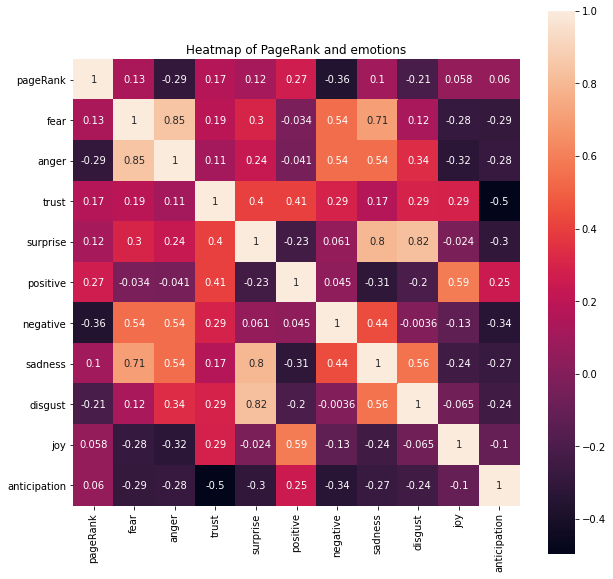

In [253]:
df_5c = df_pr.merge(sport_fra_emo, left_on='node', right_on='user').dropna()
df_5c.drop(columns=['user', 'node', 'anticip'], inplace=True) # drop 'anticip', since values are all 0
import seaborn as sns
plt.figure(figsize=(10,10))
sns.heatmap(df_5c.corr(), linecolor='blue', square='equal', annot=True)
plt.title('Heatmap of PageRank and emotions')

Text(0.5, 1.0, 'Heatmap of degree_centrality and emotions')

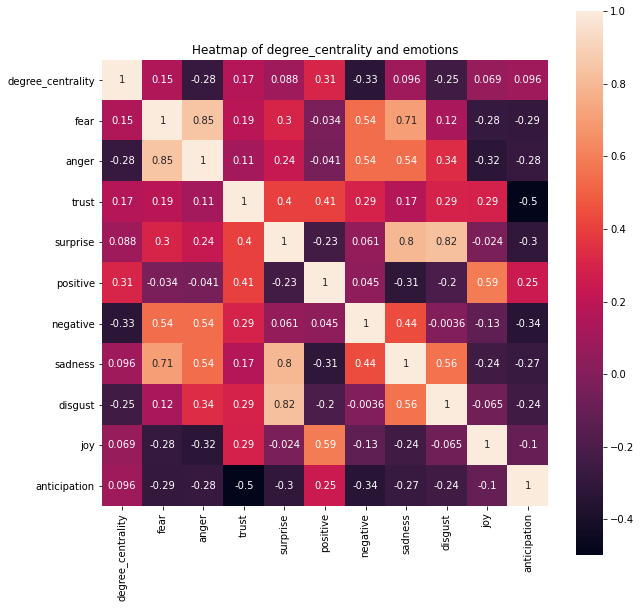

In [254]:
df_5c_dc =  df_dc.merge(sport_fra_emo, left_on='node', right_on='user').dropna()
df_5c_dc.drop(columns=['user', 'node', 'anticip'], inplace=True) # drop 'anticip', since values are all 0
plt.figure(figsize=(10,10))
sns.heatmap(df_5c_dc.corr(), linecolor='blue', square='equal', annot=True)
plt.title('Heatmap of degree_centrality and emotions')

**Scatter plot of PageRank and emotions**

Text(0.5, 1.0, 'Scatter plot of PageRank and emotions')

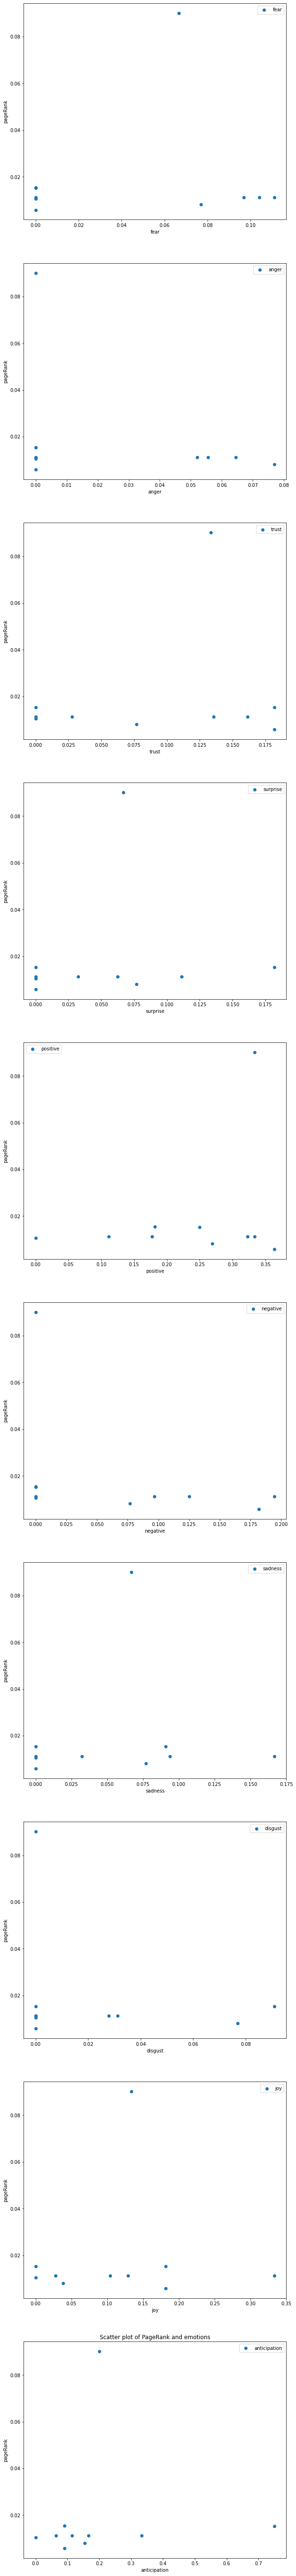

In [255]:
fig, ax = plt.subplots(10,1, figsize=(10,100))
for i, j in enumerate(df_5c.columns[1:]):
    # ax[i].scatter(df_5c[df_5c[j] > 0][j], df_5c[df_5c[j] > 0].pageRank, label=j)
    # ax[i].scatter(df_5c.iloc[:, i+1], df_5c.pageRank, label=df_5c.columns[i+1])
    ax[i].scatter(df_5c[j], df_5c.pageRank, label=j)
    ax[i].set_ylabel('pageRank')
    ax[i].set_xlabel(j)
    ax[i].legend()
plt.title('Scatter plot of PageRank and emotions')  

**Scatter plot of degree centrality and emotions**

Text(0.5, 1.0, 'Scatter plot of degree_centrality and emotions')

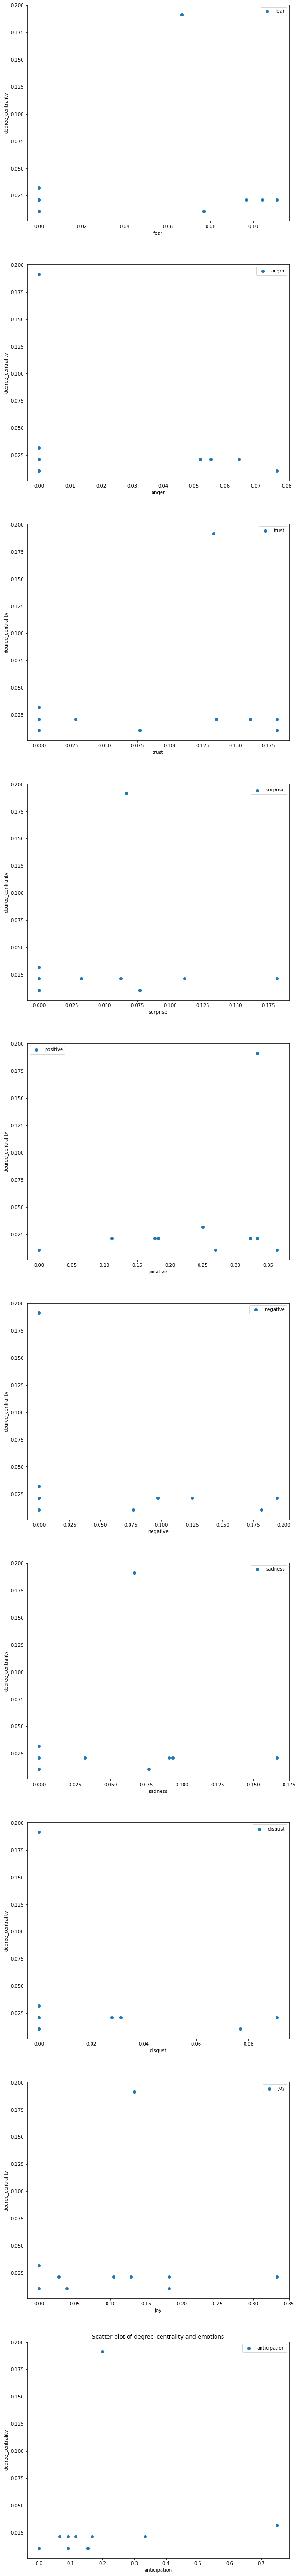

In [256]:
fig, ax = plt.subplots(10,1, figsize=(10,100))
for i, j in enumerate(df_5c.columns[1:]):
    # ax[i].scatter(df_5c_dc[df_5c_dc[j] > 0][j], df_5c_dc[df_5c_dc[j] > 0].degree_centrality, label=j)
    ax[i].scatter(df_5c_dc[j], df_5c_dc.degree_centrality, label=j)
    # ax[i].scatter(df_5c.iloc[:, i+1], df_5c.pageRank, label=df_5c.columns[i+1])
    ax[i].set_ylabel('degree_centrality')
    ax[i].set_xlabel(j)
    ax[i].legend()
plt.title('Scatter plot of degree_centrality and emotions')

**Actually, I did not see any clear trend. The reason may be that the most of sportstag tweets are exactly the same and seems like spam and advertisement(like follow us, added us...). This make tweet data not meaningful. As top feaquency k words shown above, top words are 'http', 'com', 'added', 'wefollow' for the most of users.**

#   **I completed the user study on Dec 5 at 00:52am using username: sheng.gao@mail.utoronto.ca**
#   **I choose to skip Q6.**